<a href="https://colab.research.google.com/github/SergeyHSE/PostsAnalysis.github.io/blob/main/VKPostsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
file = files.upload()

Saving АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx to АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx


In [3]:
df = pd.read_excel('/content/АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx')
df.head()

,Title_URL,Дата публикации,Текст поста,Изображение,Лайки,Поделились,Кол-во просмотров
0,https://vk.com/wall-137838362_645,15 июл 2020,Контроллер для автоматизации гроубоксов и тепл...,NaN,98.0,5.0,7.5K
1,https://vk.com/wall-137838362_470,24 янв 2020,Будущее наступило: продукты будут выращивать п...,NaN,41.0,4.0,6.8K
2,https://vk.com/wall-137838362_603,24 мая 2020,Экобокс в гостях у программы Утренний экпресс ...,NaN,74.0,NaN,5.6K
3,https://vk.com/wall-137838362_573,25 апр 2020,Фото от клиента. #клубника на вертикальной фер...,NaN,51.0,2.0,4.8K
4,https://vk.com/wall-137838362_666,3 авг 2020,Прошло ещё 6 дней. Салаты выращиваемые на раст...,NaN,30.0,1.0,3.6K


In [4]:
df = df.drop(['Title_URL', 'Изображение'], axis=1)
df.head()

,Дата публикации,Текст поста,Лайки,Поделились,Кол-во просмотров
0,15 июл 2020,Контроллер для автоматизации гроубоксов и тепл...,98.0,5.0,7.5K
1,24 янв 2020,Будущее наступило: продукты будут выращивать п...,41.0,4.0,6.8K
2,24 мая 2020,Экобокс в гостях у программы Утренний экпресс ...,74.0,NaN,5.6K
3,25 апр 2020,Фото от клиента. #клубника на вертикальной фер...,51.0,2.0,4.8K
4,3 авг 2020,Прошло ещё 6 дней. Салаты выращиваемые на раст...,30.0,1.0,3.6K


In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
stop_words = set(stopwords.words("russian"))

In [7]:
all_posts = ''.join(df['Текст поста'].dropna())

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
tokens = word_tokenize(all_posts)

In [10]:
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and
                   word.lower() not in stop_words]

In [11]:
fdist = FreqDist(filtered_tokens)

In [12]:
additional_stop_words = ["это", "ещё", "которые", "очень", "почему", "сегодня",
                         "нужно", "поэтому", "также", "однако"]
filtered_tokens = [word for word in filtered_tokens if word not in additional_stop_words]

fdist_filtered = FreqDist(filtered_tokens)

In [13]:
print('Наиболее часто встречающиеся слова:')
for word, frequency in fdist_filtered.most_common(30):
  print(f'{word}: {frequency}')

Наиболее часто встречающиеся слова:
растений: 124
растения: 101
выращивания: 53
agroaspect: 49
растение: 47
vefur: 46
вертикальныефермы: 36
зелень: 35
света: 33
ecobox: 33
семена: 32
экобокс: 31
клубника: 31
листья: 31
зелени: 30
вкус: 28
гидропоника: 27
помогает: 27
ферме: 26
клубники: 26
показать: 25
выращивать: 25
вертикальной: 25
система: 25
использовать: 25
гидропонике: 24
свет: 23
фермы: 22
почвы: 22
вермикулит: 22


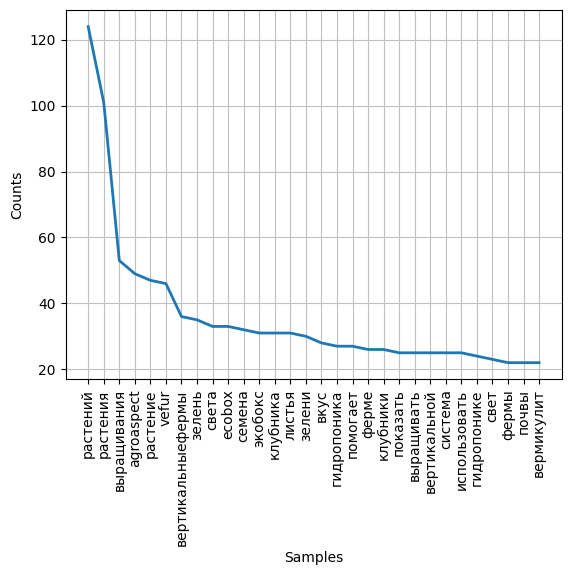

In [14]:
fdist_filtered.plot(30, cumulative=False)
plt.show()

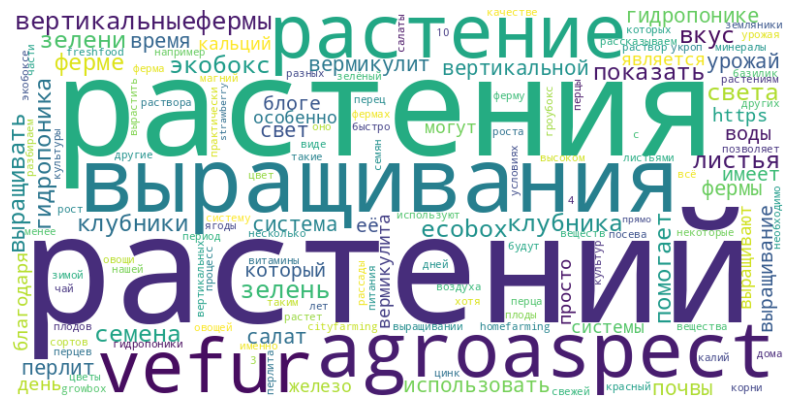

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=150,
                      background_color='white').generate_from_frequencies(fdist_filtered)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df['Текст поста'].isnull().sum()

24

In [20]:
df['Текст поста'].fillna('', inplace=True)

In [21]:
def contains_berry(text):
    return "клубник" in text.lower() or "земляник" in text.lower()

df['Упоминание ягоды'] = df['Текст поста'].apply(contains_berry)

total_posts = len(df)
posts_with_berry = df['Упоминание ягоды'].sum()

print(f"Общее количество постов: {total_posts}")
print(f"Количество постов с упоминанием ягоды: {posts_with_berry}")
print(f"Процент постов с упоминанием ягоды: {(posts_with_berry / total_posts) * 100:.2f}%")

Общее количество постов: 492
Количество постов с упоминанием ягоды: 46
Процент постов с упоминанием ягоды: 9.35%
